#AutoML- Credit card customers (Predict Churning customers) 


Using h2o AutoML Python library 

**AutoML:**

The technique of automating machine learning workflows is known as automated machine learning (AutoML).

One of the important roles of automated machine learning is to find the optimum values of hyperparameters for a model to improve its performance and fairness with respect to its reproducibility

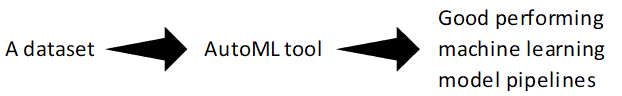

AutoML performs processes like: 
* data preprocessing
* algorithm selection
* hyperparameter tuning
* model training

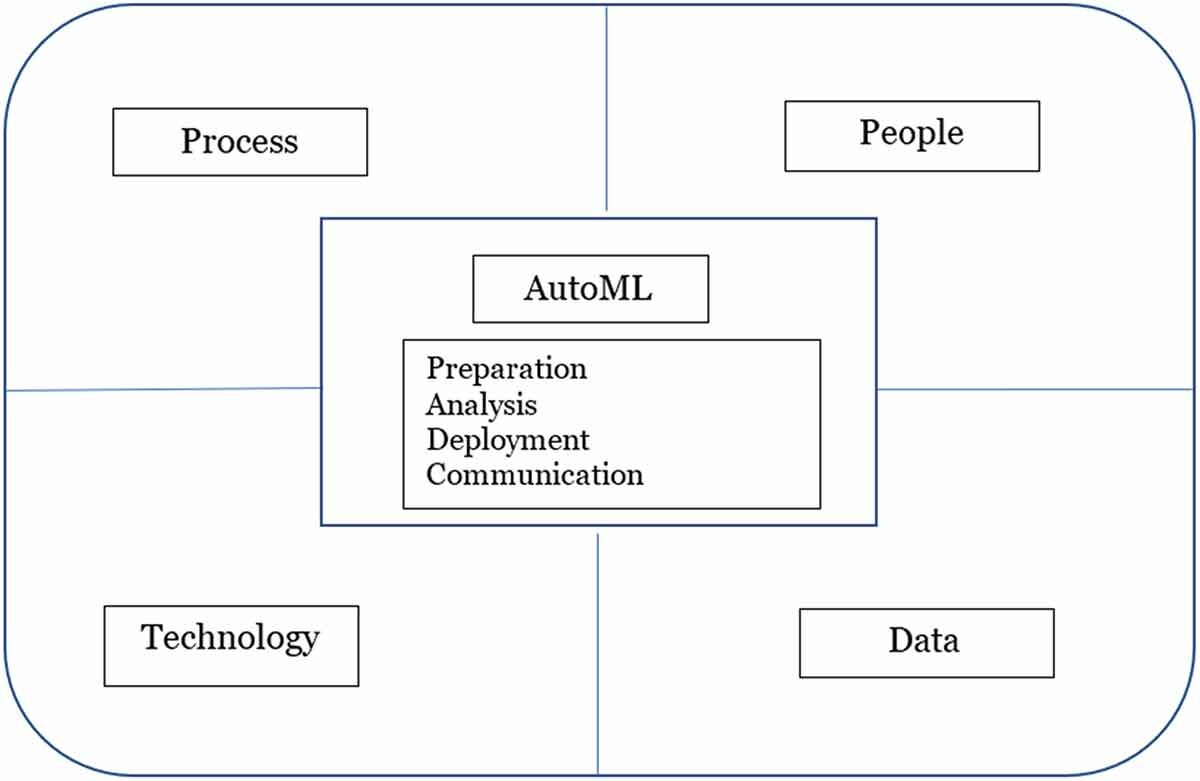


**H2O:**



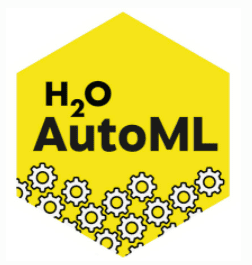

H2O is an open-source, in-memory, distributed, scalable and fast machine learning platform. Its core code is written in Java. But we can use it in other languages like Python, Scala, and R. The tool currently supports both supervised and unsupervised learning problems.


Required Stopping Parameters:
One of the following stopping strategies (time or number-of-model based) must be specified. When both options are set, then the AutoML run will stop as soon as it hits one of either When both options are set, then the AutoML run will stop as soon as it hits either of these limits.

* max_runtime_secs: This argument specifies the maximum time that the AutoML process will run for. The default is 0 (no limit), but dynamically sets to 1 hour if none of max_runtime_secs and max_models are specified by the user.

* max_models: Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models. Defaults to NULL/None. Always set this parameter to ensure AutoML reproducibility: all models are then trained until convergence and none is constrained by a time budget.



The H2O AutoML interface is designed to have as few parameters as possible so that all the user needs to do is point to their dataset, identify the response column and optionally specify a time constraint or limit on the number of total models trained.


Required Data Parameters
* y: This argument is the name (or index) of the response column.
* training_frame: Specifies the training set.



###Installing H2O

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.4 MB 48 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=942e5baaeb5a5d5a44a2693dda2e023729b9717bc3ab3a76a66115ea740ce0f8
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


###Importing libraries

In [26]:
import numpy as np 
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

import h2o
from h2o.automl import H2OAutoML

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

import seaborn as sns



To use H2O in Python, we first initialize a connection between our Python and an H2O local server. 

Connecting to cluster

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprs9je0_n
  JVM stdout: /tmp/tmprs9je0_n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprs9je0_n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_djbv7l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**About the dataset: Credit Card customers**

The bank's manager is concerned that more and more consumers are abandoning their credit card services. They would certainly like it if someone could foresee who was going to leave so they could reach out to them in advance, improve their services, and influence customers' decisions.


Dataset consists of 10,000 customers and there are nearly 18 features.

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Demographic variable - Customer's Age in Years
* Gender: Demographic variable - M=Male, F=Female
* Dependent_count: Demographic variable - Number of dependents
* Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
* Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
* Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book: Period of relationship with bank 
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio



###Loading dataset 

In [6]:
data = h2o.import_file(path='/content/BankChurners.csv')
data.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:10127
Cols:23

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
type,int,enum,int,enum,int,enum,enum,enum,enum,int,int,int,int,real,int,real,real,int,int,real,real,real,real
mins,708082083.0,,26.0,,0.0,,,,,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0,7.6642e-06,0.00041998
mean,739177606.3336623,,46.32596030413744,,2.346203219117213,,,,,35.928409203120374,3.81258023106547,2.3411671768539546,2.455317468154438,8631.953698034955,1162.814061419967,7469.139636614989,0.7599406536980345,4404.0863039399665,64.8586945788486,0.7122223758269972,0.27489355189098463,0.15999746397877954,0.8400025708403283
maxs,828343083.0,,73.0,,5.0,,,,,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3.397,18484.0,139.0,3.714,0.999,0.99958,0.99999
sigma,36903783.45023114,,8.016814032549032,,1.2989083489037907,,,,,7.986416330872064,1.554407865338825,1.0106223994182812,1.106225142635924,9088.776650223155,814.9873352357519,9090.685323679105,0.2192067692307027,3397.1292535570924,23.472570449232975,0.23808609133294148,0.2756914692523878,0.3653010123804693,0.36530103711017964
zeros,0,,0,,904,,,,,0,0,29,399,0,2470,0,5,0,0,7,2470,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,768805383.0,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061,9.3448e-05,0.99991
1,818770008.0,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105,5.6861e-05,0.99994
2,713982108.0,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.0,2.1081e-05,0.99998


In [7]:
data.types

{'CLIENTNUM': 'int',
 'Attrition_Flag': 'enum',
 'Customer_Age': 'int',
 'Gender': 'enum',
 'Dependent_count': 'int',
 'Education_Level': 'enum',
 'Marital_Status': 'enum',
 'Income_Category': 'enum',
 'Card_Category': 'enum',
 'Months_on_book': 'int',
 'Total_Relationship_Count': 'int',
 'Months_Inactive_12_mon': 'int',
 'Contacts_Count_12_mon': 'int',
 'Credit_Limit': 'real',
 'Total_Revolving_Bal': 'int',
 'Avg_Open_To_Buy': 'real',
 'Total_Amt_Chng_Q4_Q1': 'real',
 'Total_Trans_Amt': 'int',
 'Total_Trans_Ct': 'int',
 'Total_Ct_Chng_Q4_Q1': 'real',
 'Avg_Utilization_Ratio': 'real',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'real',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'real'}

Removing last two columns from data set as they are not required for prediction 

In [8]:
data=data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [9]:
data.head()


CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7.68805e+08,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
8.1877e+08,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
7.13982e+08,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0
7.69912e+08,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1.405,1171,20,2.333,0.76
7.09106e+08,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,2.175,816,28,2.5,0
7.13062e+08,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311
8.10347e+08,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516,2264,32252,1.975,1330,31,0.722,0.066
8.18906e+08,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081,1396,27685,2.204,1538,36,0.714,0.048
7.10931e+08,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352,2517,19835,3.355,1350,24,1.182,0.113
7.19662e+08,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656,1677,9979,1.524,1441,32,0.882,0.144


In [10]:
data.describe()

Rows:10127
Cols:21

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
type,int,enum,int,enum,int,enum,enum,enum,enum,int,int,int,int,real,int,real,real,int,int,real,real
mins,708082083.0,,26.0,,0.0,,,,,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0
mean,739177606.3336623,,46.32596030413744,,2.346203219117213,,,,,35.928409203120374,3.81258023106547,2.3411671768539546,2.455317468154438,8631.953698034955,1162.814061419967,7469.139636614989,0.7599406536980345,4404.0863039399665,64.8586945788486,0.7122223758269972,0.27489355189098463
maxs,828343083.0,,73.0,,5.0,,,,,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3.397,18484.0,139.0,3.714,0.999
sigma,36903783.45023114,,8.016814032549032,,1.2989083489037907,,,,,7.986416330872064,1.554407865338825,1.0106223994182812,1.106225142635924,9088.776650223155,814.9873352357519,9090.685323679105,0.2192067692307027,3397.1292535570924,23.472570449232975,0.23808609133294148,0.2756914692523878
zeros,0,,0,,904,,,,,0,0,29,399,0,2470,0,5,0,0,7,2470
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,768805383.0,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,818770008.0,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,713982108.0,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.0


#Binary Classification 

###Splitting data into train and test data

In [11]:
data_train,data_test = data.split_frame(ratios=[.15])

In [12]:
data_train.head()

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7.13982e+08,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0
7.12397e+08,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436,680,1756,1.19,1570,29,0.611,0.279
8.11604e+08,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492,1560,932,0.573,1126,23,0.353,0.626
8.04424e+08,Existing Customer,63,M,1,Unknown,Married,$60K - $80K,Blue,56,3,3,2,10215,1010,9205,0.843,1904,40,1,0.099
7.083e+08,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882,605,7277,1.052,704,16,0.143,0.077
7.73146e+08,Existing Customer,50,F,1,College,Single,$40K - $60K,Silver,43,3,2,3,17304,2517,14787,1.449,1756,33,1.2,0.145
7.20573e+08,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,2,3,3,9830,2055,7775,0.977,1042,23,0.917,0.209
7.12031e+08,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516,0,34516,0.763,691,15,0.5,0
7.79058e+08,Existing Customer,49,M,3,Graduate,Divorced,$60K - $80K,Blue,30,6,1,2,2536,1823,713,0.703,1468,23,0.353,0.719
7.11744e+08,Existing Customer,43,F,3,Uneducated,Single,Less than $40K,Blue,35,5,2,3,4026,0,4026,0.483,1237,32,0.6,0


In [13]:
y = "Attrition_Flag" #target variable 
x = data.columns

###Model training using H2O

In [14]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

* **seed:** Integer. 
Set a seed for reproducibility. AutoML can only guarantee reproducibility under certain conditions. H2O Deep Learning models are not reproducible by default for performance reasons, so if the user requires reproducibility, then exclude_algos must contain "DeepLearning". In addition max_models must be used because max_runtime_secs is resource limited, meaning that if the available compute resources are not the same between runs, AutoML may be able to train more models on one run vs another. Defaults to NULL/None.

* **verbosity:** The verbosity of the backend messages printed during training. Must be one of "debug", "info", "warn". Defaults to NULL/None (client logging disabled).

* **nfolds:** Specify a value >= 2 for the number of folds for k-fold cross-validation of the models in the AutoML run or specify “-1” to let AutoML choose if k-fold cross-validation or blending mode should be used. Blending mode will use part of training_frame (if no blending_frame is provided) to train Stacked Ensembles. Use 0 to disable cross-validation; this will also disable Stacked Ensembles (thus decreasing the overall best model performance). This value defaults to “-1”.

In [15]:
aml.train(x = x, y = y, training_frame = data_train)

AutoML progress: |
03:47:46.656: Project: AutoML_1_20221108_34746
03:47:46.658: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:47:46.658: Setting stopping tolerance adaptively based on the training frame: 0.025863030005593587
03:47:46.658: Build control seed: 10
03:47:46.671: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
03:47:46.733: training frame: Frame key: AutoML_1_20221108_34746_training_py_4_sid_b374    cols: 21    rows: 1343  chunks: 8    size: 108819  checksum: 7324358190038910949
03:47:46.741: validation frame: Frame key: AutoML_1_20221108_34746_validation_py_4_sid_b374    cols: 21    rows: 152  chunks: 8    size: 40620  checksum: 9112990343693675772
03:47:46.742: leaderboard frame: Frame key: AutoML_1_20221108_34746_validation_py_4_sid_b374    cols: 21    rows: 152  chunks: 8    size: 40620  checksum: 9112990343693675772
03:47:

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20221108_34746


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    80                 80                          56207                  8            10           9.975         31            67            51.2125

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00010461697149153147
RMSE: 0.010228243812675345
LogLoss: 0.004212331261582342
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8831805286967997
                   Attrited Customer    Existing Customer    Error    Rate
-----------------  -------------------  -------------------  -------  ------------
Attrited Customer  221                  0                    0        (0.0/221.0)
Existing Customer  0                    1122                 0        (0.0/1122.0)
Total              221                  1122                 0        (0.0/1343.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.883181     1         227
max f2                       0.883181     1         227
max f0point5                 0.883181     1         227
max accuracy                 0.883181     1         227
max precision                0.999905     1         0
max recall                   0.883181     1         227
max specificity              0.999905     1         0
max absolute_mcc             0.883181     1         227
max min_per_class_accuracy   0.883181     1         227
max mean_per_class_accuracy  0.883181     1         227
max tns                      0.999905     221       0
max fns                      0.999905     1107      0
max fps                      0.000866579  221       399
max tps                      0.883181     1122      227
max tnr                      0.999905     1         0
max fnr                      0.999905     0.986631  0
max fpr                      0.000866579  1         399
max tpr                      0.883181     1         227

Gains/Lift Table: Avg response rate: 83.54 %, avg score: 83.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104244                   0.9999             1.19697   1.19697            1                0.999906    1                           0.999906            0.0124777       0.0124777                  19.697    19.697             0.0124777
2        0.0201042                   0.999893           1.19697   1.19697            1                0.999896    1                           0.999901            0.0115865       0.0240642                  19.697    19.697             0.0240642
3        0.0305287                   0.999888           1.19697   1.19697            1                0.99989     1                           0.999897            0.0124777       0.0365419                  19.697    19.697             0.0365419
4        0.0402085                   0.999884           1.19697   1.19697            1                0.999886    1                           0.999894            0.0115865       0.0481283                  19.697    19.697             0.0

### Leaderboard for binary classification 

The H2O AutoML Leaderboard lists any models that have been created during the automl_reg() training process.

The training process automatically uses the top model.

The available models can be shown with automl_leaderboard()



In [16]:
lb = aml.leaderboard

In [17]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_1_20221108_34746,0.990965,0.119615,0.997368,0.0399267,0.198434,0.0393762
GBM_3_AutoML_1_20221108_34746,0.988278,0.134389,0.996683,0.0799756,0.212372,0.0451019
GBM_2_AutoML_1_20221108_34746,0.98779,0.139254,0.996524,0.0356532,0.215372,0.046385
XGBoost_3_AutoML_1_20221108_34746,0.980952,0.164594,0.994394,0.112821,0.230452,0.053108
GBM_1_AutoML_1_20221108_34746,0.974847,0.176044,0.9927,0.0742369,0.230848,0.0532908
XRT_1_AutoML_1_20221108_34746,0.971062,0.211736,0.991836,0.0870574,0.255124,0.0650882
DRF_1_AutoML_1_20221108_34746,0.967033,0.228221,0.99059,0.194261,0.267742,0.0716859
XGBoost_1_AutoML_1_20221108_34746,0.966545,0.203548,0.989787,0.137118,0.250932,0.0629667
XGBoost_2_AutoML_1_20221108_34746,0.96337,0.217346,0.989208,0.105617,0.260649,0.067938
GLM_1_AutoML_1_20221108_34746,0.899145,0.332567,0.966969,0.211355,0.316992,0.100484


### Best Model 


In [18]:
best_model_bc = h2o.get_model(aml.leaderboard[0,'model_id'])

In [21]:
best_model_bc.algo

'gbm'

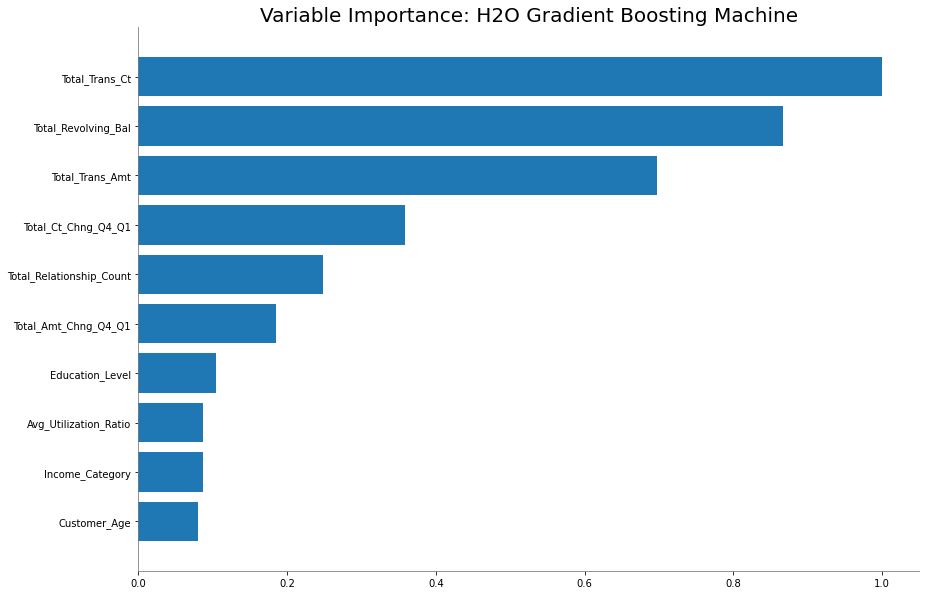

<Figure size 432x288 with 0 Axes>

In [23]:
best_model_bc.varimp_plot()

In [19]:
data_pred=aml.leader.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [36]:
data_pred

predict,Attrited Customer,Existing Customer
Existing Customer,0.000596042,0.999404
Existing Customer,0.000605658,0.999394
Existing Customer,0.00778214,0.992218
Existing Customer,0.00728324,0.992717
Attrited Customer,0.634078,0.365922
Existing Customer,0.00117761,0.998822
Existing Customer,0.00142397,0.998576
Existing Customer,0.00881035,0.99119
Existing Customer,0.00176351,0.998236
Existing Customer,0.00102364,0.998976


In [37]:
aml.leader.model_performance(data_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.03278328634907336
RMSE: 0.18106155403363067
LogLoss: 0.1155179426646483
Mean Per-Class Error: 0.10185751531942468
AUC: 0.9836335991591536
AUCPR: 0.9967761124085878
Gini: 0.9672671983183072

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42020191480975455
                   Attrited Customer    Existing Customer    Error    Rate
-----------------  -------------------  -------------------  -------  --------------
Attrited Customer  1096                 254                  0.1881   (254.0/1350.0)
Existing Customer  113                  7146                 0.0156   (113.0/7259.0)
Total              1209                 7400                 0.0426   (367.0/8609.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.420202     0.974964  238
max f2                       0.237886     0.982856  285
max f0point5                 0.789893     0.977367  135
max accuracy                 0.436047     0.95737   234
max precision                0.99958      1         0
max recall                   0.00358448   1         396
max specificity              0.99958      1         0
max absolute_mcc             0.598288     0.836601  191
max min_per_class_accuracy   0.89513      0.933186  91
max mean_per_class_accuracy  0.858854     0.934395  107
max tns                      0.99958      1350      0
max fns                      0.99958      6413      0
max fps                      0.00142114   1350      399
max tps                      0.00358448   7259      396
max tnr                      0.99958      1         0
max fnr                      0.99958      0.883455  0
max fpr                      0.00142114   1         399
max tpr                      0.00358448   1         396

Gains/Lift Table: Avg response rate: 84.32 %, avg score: 84.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101057                   0.999664           1.18598    1.18598            1                0.999695   1                           0.999695            0.0119851       0.0119851                  18.5976   18.5976            0.0119851
2        0.0200952                   0.999633           1.18598    1.18598            1                0.999647   1                           0.999671            0.0118474       0.0238325                  18.5976   18.5976            0.0238325
3        0.0300848                   0.999612           1.18598    1.18598            1                0.999622   1                           0.999655            0.0118474       0.0356798                  18.5976   18.5976            0.0356798
4        0.0400743                   0.999594           1.18598    1.18598            1                0.999604   1                           0.999642            0.0118474       0.0475272                  18.5976   18.5976            0.0475272
5        0.0500639                   0.999572           1.18598    1.18598            1                0.999582   1                           0.99963             0.0118474       0.0593746                  18.5976   18.5976            0.0593746
6        0.100012                    0.9995             1.18598    1.18598            1                0.999536   1                           0.999583            0.0592368       0.118611                   18.5976   18.5976            0.118611
7        0.150076                    0.999427   

In [38]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [39]:
model_ids

['GBM_3_AutoML_4_20221108_25239',
 'GBM_4_AutoML_4_20221108_25239',
 'GBM_2_AutoML_4_20221108_25239',
 'XGBoost_3_AutoML_4_20221108_25239',
 'XRT_1_AutoML_4_20221108_25239',
 'XGBoost_2_AutoML_4_20221108_25239',
 'GBM_1_AutoML_4_20221108_25239',
 'DRF_1_AutoML_4_20221108_25239',
 'XGBoost_1_AutoML_4_20221108_25239',
 'GLM_1_AutoML_4_20221108_25239']

### Summary 


* The target variable is significanlty dependent on independent variables 


* For a GBM Model or tree based models we do not validate any assumptions 


* Hyperparameters in this GBM model is equal to the number of trees. i.e 80. 

* Using variable importane plot, we can summarize that total_trans_ct is the most important variable 


* This model is classifying/predicting whether a customer will leave the credit card service or not. 

MSE: 0.00010461697149153147

RMSE: 0.010228243812675345

LogLoss: 0.004212331261582342

Mean Per-Class Error: 0.0

AUC: 1.0

AUCPR: 1.0

Gini: 1.0

For a binary classification, the predicted values make sense. 

#Multiclass Classification 

Copying dataset for prediction 

In [32]:
mc_data=data

mc_data

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7.68805e+08,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
8.1877e+08,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
7.13982e+08,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0
7.69912e+08,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1.405,1171,20,2.333,0.76
7.09106e+08,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,2.175,816,28,2.5,0
7.13062e+08,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311
8.10347e+08,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516,2264,32252,1.975,1330,31,0.722,0.066
8.18906e+08,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081,1396,27685,2.204,1538,36,0.714,0.048
7.10931e+08,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352,2517,19835,3.355,1350,24,1.182,0.113
7.19662e+08,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656,1677,9979,1.524,1441,32,0.882,0.144


### Splitting data into train and test for prediction 

In [33]:
mc_data_train,mc_data_test = mc_data.split_frame(ratios=[.15])

In [34]:
y = "Card_Category" #target variable 
x = mc_data.columns

### Model Traning using H2O

In [35]:
mc_aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

In [36]:
mc_aml.train(x = x, y = y, training_frame = mc_data_train)
#h2o.display.toggle_user_tips(False)

AutoML progress: |
04:16:41.626: Project: AutoML_2_20221108_41641
04:16:41.627: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:16:41.627: Setting stopping tolerance adaptively based on the training frame: 0.025717224993681984
04:16:41.627: Build control seed: 10
04:16:41.627: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
04:16:41.658: training frame: Frame key: AutoML_2_20221108_41641_training_py_12_sid_b374    cols: 21    rows: 1358  chunks: 8    size: 109587  checksum: 1002122823286950267
04:16:41.660: validation frame: Frame key: AutoML_2_20221108_41641_validation_py_12_sid_b374    cols: 21    rows: 154  chunks: 8    size: 40351  checksum: 227238216442576136
04:16:41.661: leaderboard frame: Frame key: AutoML_2_20221108_41641_validation_py_12_sid_b374    cols: 21    rows: 154  chunks: 8    size: 40351  checksum: 227238216442576136
04:16

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20221108_41641


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 220                         36594                  1            8            5.59091       2             10            8.52727

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.020439823136662816
RMSE: 0.14296790946454668
LogLoss: 0.06747615173489144
Mean Per-Class Error: 0.4165546218487395
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Blue    Gold    Platinum    Silver    Error       Rate
------  ------  ----------  --------  ----------  ----------
1272    0       0           3         0.00235294  3 / 1,275
2       8       0           4         0.428571    6 / 14
0       0       0           1         1           1 / 1
16      0       0           52        0.235294    16 / 68
1290    8       0           60        0.0191458   26 / 1,358

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.980854
2    0.997791
3    0.999264
4    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.048525697046089736
RMSE: 0.22028548986733043
LogLoss: 0.16449127095073746
Mean Per-Class Error: 0.6463054187192119
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Blue    Gold    Platinum    Silver    Error      Rate
------  ------  ----------  --------  ---------  -------
143     0       0           2         0.0137931  2 / 145
0       0       0           1         1          1 / 1
1       0       0           0         1          1 / 1
4       0       0           3         0.571429   4 / 7
148     0       0           6         0.0519481  8 / 154

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.948052
2    0.980519
3    0.993506
4    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 04:16:48  0.002 sec   0                  0.75             1.38629             0.108984                         nan             nan                0.75               1.38629               0.12987                            nan               nan
    2022-11-08 04:16:49  0.174 sec   5                  0.454791         0.61179             0.0611193                        nan             nan                0.458746           0.621302              0.0584416                          nan               nan
    2022-11-08 04:16:49  0.356 sec   10                 0.303531         0.348362            0.0611193                      

### Leaderboard for Multiclass classification 

In [37]:
mc_lb = mc_aml.leaderboard

mc_lb

model_id,mean_per_class_error,logloss,rmse,mse
GBM_1_AutoML_2_20221108_41641,0.646305,0.164491,0.220285,0.0485257
GBM_3_AutoML_2_20221108_41641,0.646305,0.19068,0.218825,0.0478844
GLM_1_AutoML_2_20221108_41641,0.64803,0.189287,0.221884,0.0492323
XGBoost_3_AutoML_2_20221108_41641,0.680296,0.192137,0.224184,0.0502583
XGBoost_2_AutoML_2_20221108_41641,0.68202,0.196433,0.227201,0.0516201
GBM_2_AutoML_2_20221108_41641,0.68202,0.192411,0.221307,0.0489769
GBM_4_AutoML_2_20221108_41641,0.68202,0.192605,0.222871,0.0496713
XRT_1_AutoML_2_20221108_41641,0.683744,0.359179,0.221648,0.0491277
XGBoost_1_AutoML_2_20221108_41641,0.685468,0.192085,0.234958,0.0552051
DRF_1_AutoML_2_20221108_41641,0.717734,0.21816,0.2324,0.0540097


In [38]:
mc_data_pred=mc_aml.leader.predict(mc_data_test)

mc_data_pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,Blue,Gold,Platinum,Silver
Blue,0.977992,0.0078688,0.00180227,0.0123374
Blue,0.97223,0.00696381,0.00115068,0.0196559
Blue,0.999207,0.000236219,0.00021895,0.000337642
Blue,0.999099,0.000404521,0.000182783,0.000314153
Blue,0.998563,0.000512759,0.000410764,0.000513947
Blue,0.998871,0.000725559,0.000134479,0.000269067
Blue,0.520603,0.174369,0.00261763,0.30241
Silver,0.386401,0.110434,0.0110055,0.49216
Blue,0.927102,0.042085,0.00306103,0.0277516
Blue,0.993203,0.00188953,0.000461795,0.00444604


### Best model 

In [39]:
best_model_mc = h2o.get_model(mc_aml.leaderboard[0,'model_id'])

In [43]:
best_model_mc.algo

'gbm'

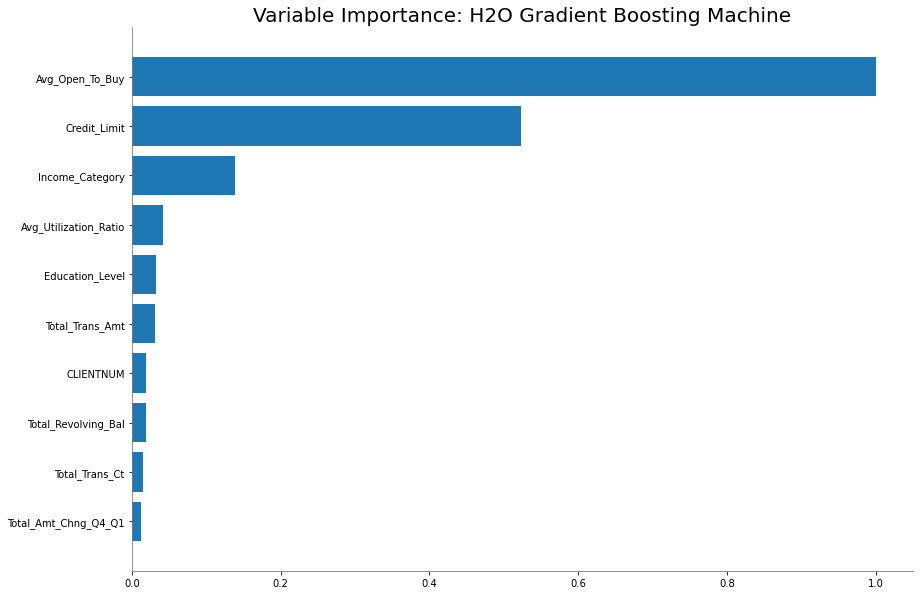

<Figure size 432x288 with 0 Axes>

In [42]:
best_model_mc.varimp_plot()

In [44]:
mc_aml.leader.model_performance(mc_data_test)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.040982777202887205
RMSE: 0.20244203417987877
LogLoss: 0.13330335763914114
Mean Per-Class Error: 0.6457231576451058
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Blue    Gold    Platinum    Silver    Error       Rate
------  ------  ----------  --------  ----------  -----------
7961    0       0           55        0.00686128  55 / 8,016
50      2       0           49        0.980198    99 / 101
8       1       0           9         1           18 / 18
279     7       0           194       0.595833    286 / 480
8298    10      0           307       0.0531631   458 / 8,615

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.946837
2    0.985374
3    0.997562
4    1

In [50]:
mc_model_ids = list(mc_aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

mc_model_ids

['GLM_1_AutoML_5_20221108_25658',
 'XGBoost_3_AutoML_5_20221108_25658',
 'GBM_1_AutoML_5_20221108_25658',
 'GBM_2_AutoML_5_20221108_25658',
 'GBM_3_AutoML_5_20221108_25658',
 'GBM_4_AutoML_5_20221108_25658',
 'XGBoost_2_AutoML_5_20221108_25658',
 'XGBoost_1_AutoML_5_20221108_25658',
 'DRF_1_AutoML_5_20221108_25658',
 'XRT_1_AutoML_5_20221108_25658']

### Summary 

* The target variable is significanlty dependent on independent variables 


* For a GBM Model or tree based models we do not validate any assumptions 

* The hyperparameters in this GBM model are 55. 

* Using variable importane plot, we can summarize that Avg_Open_To_Buy is the most important variable to predit card category 

* The results on train data 

MSE: 0.020439823136662816

RMSE: 0.14296790946454668

LogLoss: 0.06747615173489144

Mean Per-Class Error: 0.4165546218487395

AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

* These values makes sense for a multiclass classification. The value of AUC and AUCPR couldn't be dervied as the value during training the data has been set to null/default. 




# Regression Model

Copying dataset for prediction 

In [45]:
r_data = data 
r_data

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7.68805e+08,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
8.1877e+08,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
7.13982e+08,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0
7.69912e+08,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1.405,1171,20,2.333,0.76
7.09106e+08,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,2.175,816,28,2.5,0
7.13062e+08,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311
8.10347e+08,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516,2264,32252,1.975,1330,31,0.722,0.066
8.18906e+08,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081,1396,27685,2.204,1538,36,0.714,0.048
7.10931e+08,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352,2517,19835,3.355,1350,24,1.182,0.113
7.19662e+08,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656,1677,9979,1.524,1441,32,0.882,0.144


### Splitting dataset into train and test for prediction 

In [46]:
r_data_train,r_data_test = r_data.split_frame(ratios=[.15])

In [47]:
y = "Customer_Age" #target variable 
x = r_data.columns

### Model training using H2O

In [48]:
r_aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

In [49]:
r_aml.train(x = x, y = y, training_frame = r_data_train)

AutoML progress: |
04:27:28.255: Project: AutoML_3_20221108_42728
04:27:28.255: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:27:28.255: Setting stopping tolerance adaptively based on the training frame: 0.025507216374642365
04:27:28.255: Build control seed: 10
04:27:28.256: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
04:27:28.287: training frame: Frame key: AutoML_3_20221108_42728_training_py_20_sid_b374    cols: 21    rows: 1383  chunks: 8    size: 110993  checksum: -1131225338087696401
04:27:28.289: validation frame: Frame key: AutoML_3_20221108_42728_validation_py_20_sid_b374    cols: 21    rows: 154  chunks: 8    size: 40339  checksum: -981054000066233937
04:27:28.289: leaderboard frame: Frame key: AutoML_3_20221108_42728_validation_py_20_sid_b374    cols: 21    rows: 154  chunks: 8    size: 40339  checksum: -981054000066233937
04

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,60.0,60.0,41982.0,8.0,8.0,8.0,17.0,72.0,50.966667
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-11-08 04:27:33,0.002 sec,0.0,7.8722747,6.3395157,61.9727096,7.0496299,5.6506559,49.6972813
,2022-11-08 04:27:33,0.082 sec,5.0,6.0446176,4.8992577,36.5374023,5.7575943,4.6697506,33.1498916
,2022-11-08 04:27:33,0.152 sec,10.0,4.6435848,3.6928446,21.5628796,4.7507727,3.7422089,22.5698410
,2022-11-08 04:27:33,0.223 sec,15.0,3.8570671,2.9744441,14.8769669,4.3216115,3.3938125,18.6763260
,2022-11-08 04:27:33,0.296 sec,20.0,3.4146549,2.5466627,11.6598680,4.1017654,3.1769314,16.8244793
,2022-11-08 04:27:33,0.361 sec,25.0,3.1409539,2.2938466,9.8655912,4.0149053,3.0858102,16.1194647
,2022-11-08 04:27:33,0.419 sec,30.0,2.9624011,2.1176473,8.7758205,3.9353248,3.0138854,15.4867816
,2022-11-08 04:27:33,0.483 sec,35.0,2.7615310,1.9522473,7.6260537,3.8425014,2.9430432,14.7648172


### Leaderboard for Regression 

In [50]:
r_lb = r_aml.leaderboard

r_lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_3_20221108_42728,3.80231,14.4576,2.85311,0.0816596,14.4576
XGBoost_3_AutoML_3_20221108_42728,3.8617,14.9127,2.85664,0.0814571,14.9127
GBM_2_AutoML_3_20221108_42728,3.96051,15.6856,2.97922,0.08607,15.6856
GBM_4_AutoML_3_20221108_42728,4.00513,16.0411,2.91855,0.0853369,16.0411
GBM_1_AutoML_3_20221108_42728,4.00622,16.0498,3.03399,0.0856054,16.0498
XRT_1_AutoML_3_20221108_42728,4.04048,16.3255,3.10341,0.0880606,16.3255
DRF_1_AutoML_3_20221108_42728,4.08597,16.6952,3.14439,0.0891412,16.6952
XGBoost_1_AutoML_3_20221108_42728,4.14199,17.1561,3.33131,0.0887408,17.1561
XGBoost_2_AutoML_3_20221108_42728,4.37586,19.1482,3.377,0.0961851,19.1482
GLM_1_AutoML_3_20221108_42728,4.3989,19.3503,3.28007,0.0938995,19.3503


In [51]:
r_data_pred=r_aml.leader.predict(r_data_test)

r_data_pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
48.6831
46.7722
48.2375
36.2906
49.8716
38.0386
48.4654
45.0173
44.8175
60.2069


In [53]:
r_aml.leader.model_performance(r_data_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 21.7228615112007
RMSE: 4.6607790669801865
MAE: 3.32380062019939
RMSLE: 0.10433249815234981
Mean Residual Deviance: 21.7228615112007

In [40]:
r_model_ids = list(r_aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

r_model_ids

['GBM_2_AutoML_3_20221108_20121',
 'GBM_1_AutoML_3_20221108_20121',
 'GLM_1_AutoML_3_20221108_20121',
 'GBM_3_AutoML_3_20221108_20121',
 'DRF_1_AutoML_3_20221108_20121',
 'XRT_1_AutoML_3_20221108_20121',
 'GBM_4_AutoML_3_20221108_20121',
 'XGBoost_3_AutoML_3_20221108_20121',
 'XGBoost_2_AutoML_3_20221108_20121',
 'XGBoost_1_AutoML_3_20221108_20121']

### Summary 
* There are 66 hyperparameters in this GBM model. 

* The most signifcant variable to predict target variable according to te trained model in months on book

MSE: 21.7228615112007

RMSE: 4.6607790669801865

MAE: 3.32380062019939

RMSLE: 0.10433249815234981

Mean Residual Deviance: 21.7228615112007

Regression model on this dataset does not make sense. As the dataset has not been engineered accordingly for it to fit predict customer age. 



# Conclusion 

Binary classifcation is the most appropriate prediction model for this dataset. 

Further feature engineering of data before model training will improve prediction. 

For this assignment, the data has been assumed to be good 

AutoML increases the ease of model prediction and finding the best algorithm to train the model. 
 

# References 

1. 6105_H2O_automl_lending_club.ipynb
2. Python Data Science Handbook
3. Sckit learn offcial documentation
4. h2o.ai Documentation 
5. Kaggle 

Refered to https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535 article to understand model assumptions 

Used h2o.ai for autoML implementation

Refered to sample notebooks at https://github.com/aiskunks/Skunks_Skool/tree/main/INFO_6105/6105 

#Copyright 

Copyright 2022 *Sreya Vallabhaneni*

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.